In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
import tslearn
from tslearn import utils
random.seed(0)

In [11]:
br_poor = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/bank_reserves_outputs_poor.csv", header=None)
br_middle = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/bank_reserves_outputs_middle.csv", header=None)
br_rich = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/bank_reserves_outputs_rich.csv", header=None)

In [152]:
br_poor_final_val = br_poor.iloc[:,-1:]

(array([15664.,  8102.,  7266.,  6859.,  6427.,  6224.,  5379.,  9622.,
        31206.,  3251.]),
 array([  0. ,  17.4,  34.8,  52.2,  69.6,  87. , 104.4, 121.8, 139.2,
        156.6, 174. ]),
 <BarContainer object of 10 artists>)

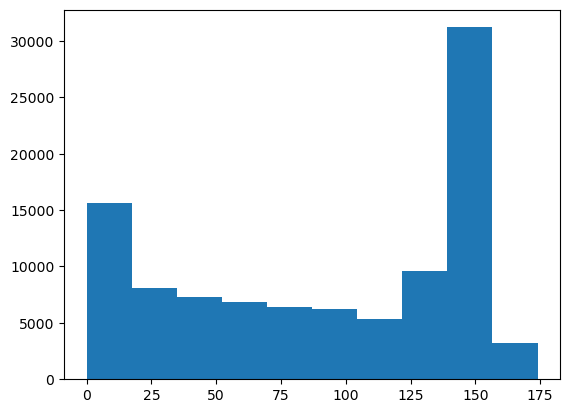

In [153]:
plt.hist(br_poor_final_val)

In [163]:
br_poor_subset = br_poor[br_poor[br_poor.columns[-1]] == 150]

In [164]:
br_poor_ts = tslearn.utils.to_time_series_dataset(br_poor_subset)

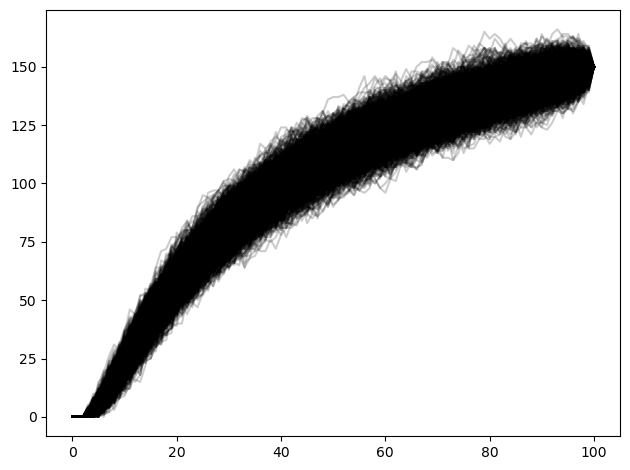

In [165]:
plt.figure()
for ts in br_poor_ts:
    plt.plot(ts.ravel(), "k-", alpha=.2)
plt.tight_layout()
plt.show()

In [60]:
rich_poor_ratio = br_rich.iloc[:,-1:]/(br_poor.iloc[:,-1:]+1)

(array([6.0126e+04, 1.1525e+04, 5.3660e+03, 3.2450e+03, 2.3300e+03,
        1.7300e+03, 1.2840e+03, 1.0020e+03, 9.1100e+02, 6.8200e+02,
        5.4400e+02, 5.3900e+02, 4.7700e+02, 4.2700e+02, 3.5100e+02,
        3.0600e+02, 2.7500e+02, 2.9100e+02, 2.0900e+02, 2.6200e+02,
        2.3600e+02, 1.3800e+02, 1.0100e+02, 2.4000e+02, 2.3000e+02,
        1.8700e+02, 7.7000e+01, 5.0000e+01, 9.0000e+01, 1.7400e+02,
        1.9300e+02, 1.9100e+02, 8.7000e+01, 3.1000e+01, 1.8000e+01,
        1.0000e+01, 2.4000e+01, 5.0000e+01, 1.0200e+02, 1.5800e+02,
        1.8200e+02, 1.6700e+02, 1.3900e+02, 9.1000e+01, 5.0000e+01,
        1.9000e+01, 4.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+01, 1.7000e+01,
        3.3000e+01, 5.3000e+01, 8.1000e+01, 1.1400e+02, 1.3300e+02,
        1.4500e+02, 1.7400e+02, 1.6700e+02, 1.3100e+02, 8.9000e+01,
        6.6000e+01, 3.8000e+01, 2.2000e+01, 1.5000e+01, 5.0000e+00,
        3.0000e+00, 2.0000e+00, 0.0000e+00, 0.00

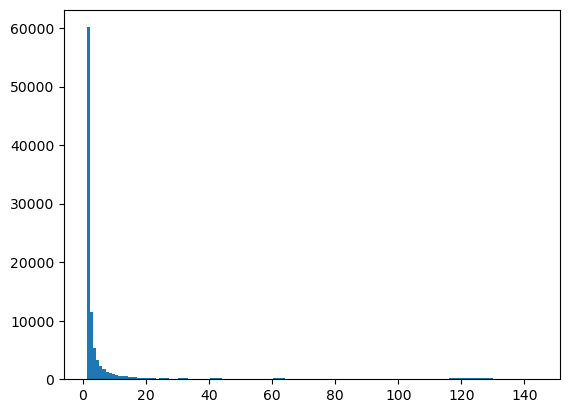

In [97]:
plt.hist(rich_poor_ratio, bins=np.arange(min(rich_poor_ratio[100]), max(rich_poor_ratio[100]) + 1, 1))

In [94]:
min(rich_poor_ratio[100])

1.1775147928994083

In [92]:
rich_poor_ratio

,100
0,3.868421
1,4.966667
2,129.000000
3,1.342105
4,2.073171
...,...
99995,1.472973
99996,1.496552
99997,1.778947
99998,2.287671


In [146]:
#rich_poor_ratio_con = (rich_poor_ratio > 1.5) & (rich_poor_ratio < 1.6)
rich_poor_ratio_con = (rich_poor_ratio > 50)
bool_array = rich_poor_ratio_con.astype(bool).values

In [147]:
rich_poor_ratio_con

,100
0,False
1,False
2,True
3,False
4,False
...,...
99995,False
99996,False
99997,False
99998,False


In [148]:
br_poor_subset = br_poor[bool_array]

In [149]:
br_poor_subset

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
32,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99882,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
99936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99942,0,0,0,0,0,0,1,1,2,3,...,2,3,2,1,1,1,1,1,1,1
99972,0,0,0,0,0,0,0,0,0,0,...,2,1,1,2,1,1,1,1,1,1


In [150]:
br_poor_ts = tslearn.utils.to_time_series_dataset(br_poor_subset)

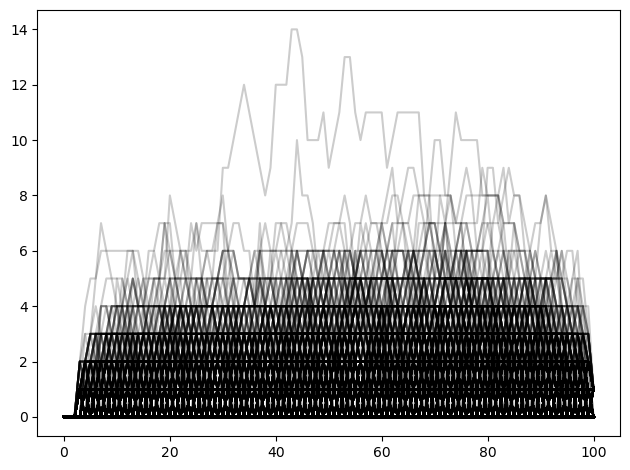

In [151]:
plt.figure()
for ts in br_poor_ts:
    plt.plot(ts.ravel(), "k-", alpha=.2)
plt.tight_layout()
plt.show()

In [61]:
ecv_active = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/epsteinCV_outputs_active.csv", header=None)
ecv_jailed = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/epsteinCV_outputs_jailed.csv", header=None)
ecv_quiet = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/epsteinCV_outputs_quiet.csv", header=None)

In [65]:
ecv_active_last_val = ecv_active.iloc[:,-1:]

(array([41721.,  1014.,   806.,  1003.,  1081.,  1191.,  1144.,  1123.,
          885.,   394.]),
 array([   0. ,  145.1,  290.2,  435.3,  580.4,  725.5,  870.6, 1015.7,
        1160.8, 1305.9, 1451. ]),
 <BarContainer object of 10 artists>)

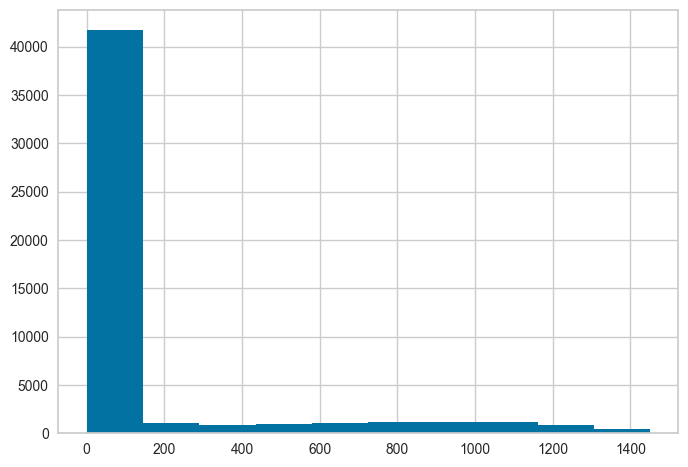

In [66]:
plt.hist(ecv_active_last_val)

In [68]:
ecv_active_subset = ecv_active[ecv_active[ecv_active.columns[-1]] == 0]

In [69]:
ecv_active_ts = to_time_series_dataset(ecv_active_subset)

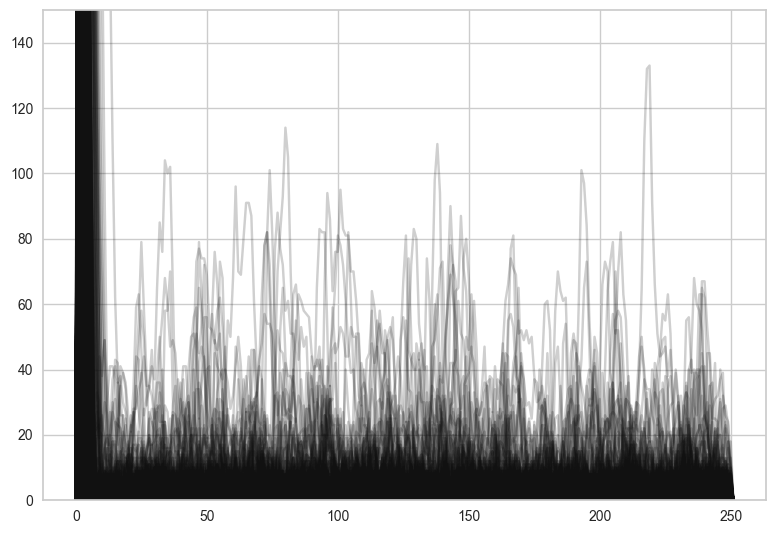

In [72]:
plt.figure()
for ts in ecv_active_ts:
    plt.plot(ts.ravel(), "k-", alpha=.2)
plt.tight_layout()
plt.ylim((0,150))
plt.show()